<a href="https://colab.research.google.com/github/Minh-A/Dacon_ArcticSeaIce_Prediction/blob/main/Dacon_Code_7_Moving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

from tqdm import tqdm  # 진행표시바

import xgboost as xgb  # XGBoost 불러오기
from xgboost import plot_importance  # Feature Importance를 불러오기 위함

from sklearn.ensemble import GradientBoostingRegressor  # 그레디언트 부스팅

In [ ]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train.csv')
fn.tail()

,month,file_nm
477,2018-08,201808.npy
478,2018-09,201809.npy
479,2018-10,201810.npy
480,2018-11,201811.npy
481,2018-12,201812.npy


In [ ]:
# 그냥
fn.iloc[255:,1]

255    200002.npy
256    200003.npy
257    200004.npy
258    200005.npy
259    200006.npy
          ...    
477    201808.npy
478    201809.npy
479    201810.npy
480    201811.npy
481    201812.npy
Name: file_nm, Length: 227, dtype: object

In [ ]:
# 11개씩 - 200801 - 351:
# 12개씩 - 200701 - 339:
# 19개씩 - 200001 - 255:

dm = fn.iloc[255:,1]
dm.shape

(227,)

In [ ]:
# 데이터 생성
data = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/200001.npy')
data = data.reshape(1,448,304,5)

for i in tqdm(dm):
    a = np.load('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/train/'+i)
    a = a.reshape(1,448,304,5)

    data = np.concatenate((data,a), axis=0)
data = np.array(data)
data = data[:,:,:,0]

data.shape

100%|██████████| 227/227 [02:53<00:00,  1.31it/s]


(228, 448, 304)

In [ ]:
# 월별 데이터 셋 만들기

# 데이터 셋 형태 변환
data = data.reshape(228,1, 448,304)

# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  # globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i]), axis=0))

  # globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i], data[60+i], data[72+i], data[84+i], data[96+i], data[108+i], data[120+i], data[132+i]), axis=0))

  globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i], data[60+i], data[72+i], data[84+i], data[96+i], data[108+i], data[120+i],
                                                            data[132+i], data[144+i], data[156+i], data[168+i], data[180+i], data[192+i], data[204+i], data[216+i]), axis=0))

  print("\n",globals()['train{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열

100%|██████████| 12/12 [00:00<00:00, 237.34it/s]


 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)

 (19, 448, 304)


In [ ]:
# 2달을 합쳐서 데이터셋 생성
# for i in tqdm(range(6)):
#   dataa = globals()['train{}'.format((i*2))]
#   datab = globals()['train{}'.format((i*2)+1)]

#   globals()['train_two{}'.format(i)] = np.array(np.concatenate((dataa, datab), axis=0))

#   print("\n",globals()['train_two{}'.format(i)].shape)

In [ ]:
# 월별 이동 데이터 셋 만들기

# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  a = globals()['train{}'.format(i)]
  globals()['mvtrain{}'.format(i)] = np.array(np.concatenate(((a[1] - a[0]).reshape(1, 448,304), (a[2] - a[1]).reshape(1, 448,304), (a[3] - a[2]).reshape(1, 448,304), (a[4] - a[3]).reshape(1, 448,304),
                                                               (a[5] - a[4]).reshape(1, 448,304), (a[6] - a[5]).reshape(1, 448,304), (a[7] - a[6]).reshape(1, 448,304), (a[8] - a[7]).reshape(1, 448,304),
                                                               (a[9] - a[8]).reshape(1, 448,304), (a[10] - a[9]).reshape(1, 448,304)), axis=0))

  print("\n",globals()['mvtrain{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열


# 함수 사용

In [ ]:
def show(npy):
    num_channel = npy.shape[0]
    plt.figure(figsize=(50, 50)) 
    for channel in range(num_channel):
      tmpimg = npy[channel, :, :]
      ax = plt.subplot(1, num_channel, channel+1)  # (행, 열, 데이터 개수) - 그리고 싶은 팜플렛
      ax.title.set_text("Ice")

      ax.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
# 소숫점 그냥 자르기
def fun(x) : 
  return np.trunc(x)

In [ ]:
# 소숫점 둘째 자리 반올림
def fun1(x) : 
  return np.around(x,2)

In [ ]:
# 점수 계산

def mae_score(true, pred):
    score = np.mean(np.abs(true-pred))
    
    return score

def f1_score(true, pred):
    target = np.where((true>250*0.05)&(true<250*0.5))
    
    true = true[target]
    pred = pred[target]
    true = np.where(true < 250*0.15, 0, 1)
    pred = np.where(pred < 250*0.15, 0, 1)
    
    right = np.sum(true * pred == 1)
    precision = right / np.sum(true+1e-8)
    recall = right / np.sum(pred+1e-8)
    score = 2 * precision*recall/(precision+recall+1e-8)
    
    return score
    
def mae_over_f1(true, pred):
    mae = mae_score(true, pred)
    f1 = f1_score(true, pred)
    score = mae/(f1+1e-8)
    
    return score

# Scikit Learn 
> https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

> 머신러닝 앙상블 (ensemble) Gradient Boosting
* https://lsjsj92.tistory.com/544?category=853217
* https://wikidocs.net/26289

> 머신러닝 앙상블 (ensemble) RandomForest
* https://lsjsj92.tistory.com/542?category=853217

## 시험용

In [ ]:
# 데이터 10개
x_train = train0[:9].reshape(9,-1).T
y_train = train0[9].reshape(1,-1).T
x_test = train0[1:10].reshape(9,-1).T

real = train0[10]

In [ ]:
# 데이터 11개
x_train = train0[:10].reshape(10,-1).T
y_train = train0[10].reshape(1,-1).T
x_test = train0[1:11].reshape(10,-1).T

real = train0[11]

In [ ]:
# 데이터 개수 확인
x_test.shape

(136192, 10)

GradientBoost 모델

In [ ]:
# GradientBoost 모델 1
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(criterion='friedman_mse')
model.fit(x_train, y_train)

In [ ]:
# GradientBoost 모델 2
print(model.score(x_train, y_train))

In [ ]:
# GradientBoost 모델 3
pre = model.predict(x_test)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real.reshape(-1), np.abs(fun(pre))))

In [ ]:
# GradientBoost 모델 4
show(np.concatenate((real.reshape(1,448,304), np.abs(fun(pre)).reshape(1,448,304))))

RandomForest 모델

In [ ]:
# RandomForest 모델 1
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

In [ ]:
# RandomForest 모델 2
print(model.score(x_train, y_train))

In [ ]:
# RandomForest 모델 3
pre = model.predict(x_test)
pre

In [ ]:
# 제출물 계산
# 실제는 4.57
print( "MAE : %s" % mae_score(real.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real.reshape(-1), np.abs(fun(pre))))

In [ ]:
# RandomForest 모델 4
show(np.concatenate((real.reshape(1,448,304), np.abs(fun(pre)).reshape(1,448,304))))

Bayesian Regression 모델

In [ ]:
# Bayesian Regression 모델 1
from sklearn import linear_model

model = linear_model.BayesianRidge()
model.fit(x_train, y_train)

In [ ]:
# Bayesian Regression 모델 2
print(model.score(x_train, y_train))

In [ ]:
# Bayesian Regression 모델 3
pre = model.predict(x_test)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real.reshape(-1), np.abs(fun(pre))))

In [ ]:
# Bayesian Regression 모델 4
show(np.concatenate((real.reshape(1,448,304), np.abs(fun(pre)).reshape(1,448,304))))

SGDRegressor 모델

In [ ]:
# SGDRegressor 모델 1
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss='huber',learning_rate='optimal')
model.fit(x_train, y_train)

In [ ]:
# SGDRegressor 모델 2
print(model.score(x_train, y_train))

In [ ]:
# SGDRegressor 모델 3
pre = model.predict(x_test)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real.reshape(-1), np.abs(fun(pre))))

In [ ]:
# SGDRegressor 모델 4
show(np.concatenate((real.reshape(1,448,304), np.abs(fun(pre)).reshape(1,448,304))))

DecisionTreeRegressor 모델

In [ ]:
# DecisionTreeRegressor 모델 1
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='mse')
model.fit(x_train, y_train)

In [ ]:
# DecisionTreeRegressor 모델 2
print(model.score(x_train, y_train))

In [ ]:
# DecisionTreeRegressor 모델 3
pre = model.predict(x_test)
pre

In [ ]:
# 제출물 계산
# 실제는 5.77
print( "MAE : %s" % mae_score(real.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real.reshape(-1), np.abs(fun(pre))))

In [ ]:
# DecisionTreeRegressor 모델 4
show(np.concatenate((real.reshape(1,448,304), np.abs(fun(pre)).reshape(1,448,304))))

HuberRegressor 모델

In [ ]:
# HuberRegressor 모델 1
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(x_train, y_train)

In [ ]:
# HuberRegressor 모델 2
print(model.score(x_train, y_train))

In [ ]:
# HuberRegressor 모델 3
pre = model.predict(x_test)
pre

In [ ]:
# 제출물 계산
# 실제는 4.35
print( "MAE : %s" % mae_score(real.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real.reshape(-1), np.abs(fun(pre))))

In [ ]:
# HuberRegressor 모델 4
show(np.concatenate((real.reshape(1,448,304), np.abs(fun(pre)).reshape(1,448,304))))

KNeighborsRegressor 모델

In [ ]:
# KNeighborsRegressor 모델 1
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=780, weights='distance', p=1, n_jobs=-1)
model.fit(x_train, y_train)

In [ ]:
# KNeighborsRegressor 모델 2
# print(model.score(x_train, y_train))

In [ ]:
# KNeighborsRegressor 모델 3
pre = model.predict(x_test)
pre = pre.reshape(-1)
pre 

In [ ]:
# 제출물 계산
# 실제는 4.35
print( "MAE : %s" % mae_score(real.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real.reshape(-1), np.abs(fun(pre))))

In [ ]:
# KNeighborsRegressor 모델 4
show(np.concatenate((real.reshape(1,448,304), np.abs(fun(pre)).reshape(1,448,304))))

In [ ]:
# 항목 확인
# 배열 내 중복된 원소 제거 후 유일한 원소를 정렬하여 반환
np.unique(fun1(pre))

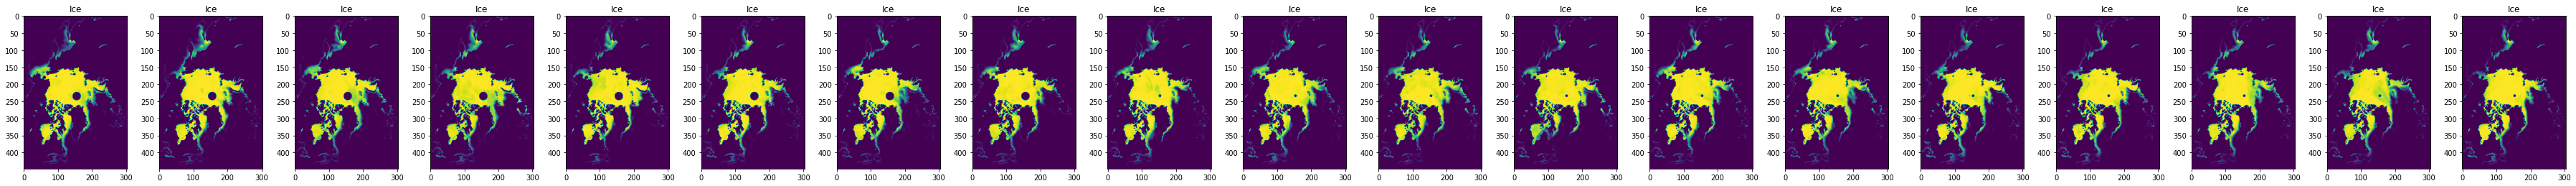

In [ ]:
# 훈련 데이터 전체로 보기
show(train0)

---

### K를 찾아서 KNNR

정해진 데이터에 대한 K를 찾아서

---
월별로 나누어서 K를 찾자

In [ ]:
# 월별 최적의 K값 찾기
# 일단은 모두 12개로 한정 
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# 저장
jj = pd.DataFrame(('데이터 셋', '데이터 빼기', 'K값', 'MAE', 'F1', 'Final')).T

for i in tqdm(range(10)):
    i = i+2
    dataset = globals()['train{}'.format(i)]
    print('\n << 데이터셋: %s >>' % i)

    datanum = [9, 10, 13]
    for j in datanum:
        print('! 데이터 뺴기: %s !' % j)
        x_train = dataset[j:17].reshape( (17-j),-1).T
        y_train = dataset[17].reshape(1,-1).T  # 변동없음
        x_test = dataset[(1+j):18].reshape( (17-j),-1).T
        real = dataset[18]  # 변동없음

        num = [500, 800, 1000]
        for k in tqdm(num):
            print('K값: %s' % k)
            model = KNeighborsRegressor(n_neighbors= k, weights='distance', p=1, n_jobs=-1)
            model.fit(x_train, y_train)

            pre = model.predict(x_test)
            pre = pre.reshape(-1)
            
            mae = mae_score(real.reshape(-1), fun1(pre))
            f1 = f1_score(real.reshape(-1), fun1(pre))
            finall = mae_over_f1(real.reshape(-1), fun1(pre))
            
            print( "MAE : %s" % mae,
                   '\n F1 : %s' % f1,
                   '\n Final %s' % finall)
            
            # 저장
            li = []
            li.append(i)
            li.append(j)
            li.append(k)
            li.append(mae)
            li.append(f1)
            li.append(finall)
            
            li1 = pd.DataFrame(li).T
            
            jj = jj.append(li1)
            jj = jj.reset_index(drop=True)

  0%|          | 0/3 [00:00<?, ?it/s]


 << 데이터셋: 2 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [05:32<11:04, 332.17s/it]

MAE : 3.9389819519501876 
 F1 : 0.703315490912971 
 Final 5.6005902711329565
K값: 800



 67%|██████▋   | 2/3 [11:44<05:44, 344.13s/it]

MAE : 3.93756013569079 
 F1 : 0.6921723662338903 
 Final 5.688698756103289
K값: 1000



100%|██████████| 3/3 [18:17<00:00, 365.79s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.9359186295817667 
 F1 : 0.6871657581077051 
 Final 5.7277571326353645
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:20<10:40, 320.21s/it]

MAE : 4.016891153665414 
 F1 : 0.6929371061639444 
 Final 5.796905750846002
K값: 800



 67%|██████▋   | 2/3 [11:05<05:27, 327.86s/it]

MAE : 4.009656954887219 
 F1 : 0.6854006415228903 
 Final 5.850092126376259
K값: 1000



100%|██████████| 3/3 [17:22<00:00, 347.48s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.006140889332706 
 F1 : 0.6817878413980829 
 Final 5.875934693053949
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:18<08:36, 258.38s/it]

MAE : 4.6006264685150375 
 F1 : 0.6802602868192941 
 Final 6.763038339921165
K값: 800



 67%|██████▋   | 2/3 [09:11<04:28, 268.87s/it]

MAE : 4.598022644501879 
 F1 : 0.6729339578119327 
 Final 6.832799151828378
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.595102208646616 
 F1 : 0.6676922908993987 
 Final 6.882065589878593

 << 데이터셋: 3 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [05:38<11:17, 338.90s/it]

MAE : 3.863840901080827 
 F1 : 0.6874095322625721 
 Final 5.620871785345312
K값: 800



 67%|██████▋   | 2/3 [11:51<05:49, 349.10s/it]

MAE : 3.822268268327067 
 F1 : 0.6801955798848276 
 Final 5.619366436901278
K값: 1000



100%|██████████| 3/3 [18:32<00:00, 370.79s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.8065781396851497 
 F1 : 0.6732526358572738 
 Final 5.65401140731963
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:21<10:42, 321.23s/it]

MAE : 3.861869346217105 
 F1 : 0.693200644351883 
 Final 5.57106996649882
K값: 800



 67%|██████▋   | 2/3 [11:07<05:28, 328.63s/it]

MAE : 3.825747694431391 
 F1 : 0.6869315271912041 
 Final 5.56932894662909
K값: 1000



100%|██████████| 3/3 [17:22<00:00, 347.64s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.812125675516917 
 F1 : 0.679199788248733 
 Final 5.612671978622791
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:15<08:30, 255.13s/it]

MAE : 4.112434357377819 
 F1 : 0.6762058436673242 
 Final 6.081630815637734
K값: 800



 67%|██████▋   | 2/3 [09:02<04:24, 264.94s/it]

MAE : 4.051854954769737 
 F1 : 0.6720967933832099 
 Final 6.0286776166371485
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.024410097509398 
 F1 : 0.6713417300940232 
 Final 5.994577511217712

 << 데이터셋: 4 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [05:48<11:36, 348.03s/it]

MAE : 3.5963952361372176 
 F1 : 0.7497440940390485 
 Final 4.796830300848765
K값: 800



 67%|██████▋   | 2/3 [12:04<05:56, 356.43s/it]

MAE : 3.5618042910009398 
 F1 : 0.7479295858934027 
 Final 4.762218677476401
K값: 1000



100%|██████████| 3/3 [18:47<00:00, 375.92s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5473646763392854 
 F1 : 0.7423648970316606 
 Final 4.778464933806463
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:26<10:53, 326.92s/it]

MAE : 3.5639738016917293 
 F1 : 0.7643215874215389 
 Final 4.662924368112714
K값: 800



 67%|██████▋   | 2/3 [11:30<05:37, 337.89s/it]

MAE : 3.528751027960526 
 F1 : 0.7587965116504516 
 Final 4.650457569685705
K값: 1000



100%|██████████| 3/3 [18:05<00:00, 361.87s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.514265301926692 
 F1 : 0.7530800614214961 
 Final 4.666522771334591
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:34<09:08, 274.32s/it]

MAE : 3.5862483846334587 
 F1 : 0.7739845295244508 
 Final 4.633488398666089
K값: 800



 67%|██████▋   | 2/3 [09:38<04:43, 283.30s/it]

MAE : 3.5378494331531956 
 F1 : 0.7792272746347606 
 Final 4.540202201481505
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5139734345629696 
 F1 : 0.7755617059133267 
 Final 4.530875315866771

 << 데이터셋: 5 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:05<12:11, 365.71s/it]

MAE : 4.316062690906955 
 F1 : 0.7913969327335874 
 Final 5.453726768262102
K값: 800



 67%|██████▋   | 2/3 [12:48<06:16, 376.79s/it]

MAE : 4.260973111489661 
 F1 : 0.7808393200690296 
 Final 5.456914050567832
K값: 1000



100%|██████████| 3/3 [19:52<00:00, 397.63s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.238583690671993 
 F1 : 0.7764054328285901 
 Final 5.45924005276166
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [05:48<11:36, 348.01s/it]

MAE : 4.319542117011279 
 F1 : 0.8012486805350794 
 Final 5.391013012609929
K값: 800



 67%|██████▋   | 2/3 [12:08<05:57, 357.61s/it]

MAE : 4.272029781484963 
 F1 : 0.7918160537998988 
 Final 5.395229999481994
K값: 1000



100%|██████████| 3/3 [18:57<00:00, 379.06s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.2538700511043235 
 F1 : 0.7864118708423063 
 Final 5.409213867099907
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [04:44<09:29, 284.67s/it]

MAE : 4.599858508576127 
 F1 : 0.7999173879612544 
 Final 5.750416880917659
K값: 800



 67%|██████▋   | 2/3 [09:57<04:53, 293.23s/it]

MAE : 4.532676074953009 
 F1 : 0.7995023657531041 
 Final 5.669371614666412
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 4.505597024788533 
 F1 : 0.7991666479514691 
 Final 5.637869122740783

 << 데이터셋: 6 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:26<12:52, 386.30s/it]

MAE : 3.395016227091166 
 F1 : 0.6925953457644551 
 Final 4.9018755306897805
K값: 800



 67%|██████▋   | 2/3 [13:32<06:38, 398.39s/it]

MAE : 3.331393987899436 
 F1 : 0.684202552971027 
 Final 4.86901711305122
K값: 1000



100%|██████████| 3/3 [21:05<00:00, 421.93s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.3058377144031943 
 F1 : 0.6776205521025686 
 Final 4.878597107717052
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [06:02<12:04, 362.43s/it]

MAE : 3.4276403900375936 
 F1 : 0.7087192888935773 
 Final 4.836386416157541
K값: 800



 67%|██████▋   | 2/3 [12:38<06:12, 372.66s/it]

MAE : 3.3561293614896615 
 F1 : 0.6969244380172299 
 Final 4.815628682618246
K값: 1000



100%|██████████| 3/3 [19:43<00:00, 394.51s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.3254798372885332 
 F1 : 0.6911167724077859 
 Final 4.811748060440486
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [05:00<10:01, 300.61s/it]

MAE : 3.5794379258693607 
 F1 : 0.7467559476782137 
 Final 4.79331686485424
K값: 800



 67%|██████▋   | 2/3 [10:31<05:09, 309.70s/it]

MAE : 3.5323800223214286 
 F1 : 0.7384180619366676 
 Final 4.78371285396221
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5136861930216163 
 F1 : 0.7277149635611126 
 Final 4.828382430867407

 << 데이터셋: 7 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:45<13:30, 405.08s/it]

MAE : 3.1803962787828945 
 F1 : 0.7345260931636814 
 Final 4.329861478148417
K값: 800



 67%|██████▋   | 2/3 [14:08<06:56, 416.65s/it]

MAE : 3.130996607730263 
 F1 : 0.7198624902718057 
 Final 4.349437019636474
K값: 1000



100%|██████████| 3/3 [21:56<00:00, 438.72s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.110869214050752 
 F1 : 0.708364339555202 
 Final 4.39162306234657
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [06:22<12:45, 382.69s/it]

MAE : 3.1797853031015038 
 F1 : 0.7184513410778588 
 Final 4.42588812496632
K값: 800



 67%|██████▋   | 2/3 [13:19<06:32, 392.86s/it]

MAE : 3.150234154722744 
 F1 : 0.7015445751632108 
 Final 4.490426155865572
K값: 1000



100%|██████████| 3/3 [20:46<00:00, 415.66s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.132823146734023 
 F1 : 0.6914199512518895 
 Final 4.530998990919661
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [05:14<10:28, 314.12s/it]

MAE : 3.592407483552632 
 F1 : 0.6718226161290805 
 Final 5.347255873550179
K값: 800



 67%|██████▋   | 2/3 [11:01<05:24, 324.22s/it]

MAE : 3.574509589403196 
 F1 : 0.6602597218398962 
 Final 5.413793113571198
K값: 1000



  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 3.5602359903665413 
 F1 : 0.6599011004843465 
 Final 5.395105317755021

 << 데이터셋: 8 >>
! 데이터 뺴기: 9 !
K값: 500



 33%|███▎      | 1/3 [06:54<13:48, 414.00s/it]

MAE : 2.4812607201597743 
 F1 : 0.6959152618086549 
 Final 3.5654638153163107
K값: 800



 67%|██████▋   | 2/3 [14:24<07:04, 424.87s/it]

MAE : 2.4290752026550755 
 F1 : 0.6899938431395659 
 Final 3.520430206156841
K값: 1000



100%|██████████| 3/3 [22:23<00:00, 447.83s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 2.411608391094925 
 F1 : 0.6882916098833721 
 Final 3.503759629535459
! 데이터 뺴기: 10 !
K값: 500



 33%|███▎      | 1/3 [06:31<13:03, 391.77s/it]

MAE : 2.5005953359962407 
 F1 : 0.7020826863392894 
 Final 3.561682048332095
K값: 800



 67%|██████▋   | 2/3 [13:38<06:42, 402.16s/it]

MAE : 2.445425061677632 
 F1 : 0.6941643570397731 
 Final 3.5228328877006705
K값: 1000



100%|██████████| 3/3 [21:14<00:00, 424.87s/it]

  0%|          | 0/3 [00:00<?, ?it/s]

MAE : 2.4284330210291345 
 F1 : 0.6907407225369764 
 Final 3.5156939595988526
! 데이터 뺴기: 13 !
K값: 500



 33%|███▎      | 1/3 [05:24<10:48, 324.28s/it]

MAE : 2.6763267299107136 
 F1 : 0.7031345851734014 
 Final 3.806279406933034
K값: 800



 67%|██████▋   | 2/3 [11:20<05:33, 333.75s/it]

MAE : 2.62732891799812 
 F1 : 0.6947040314552929 
 Final 3.7819398783031253
K값: 1000


In [ ]:
##### 600, 601 차이가 뭔디 도대체 #####
from sklearn.neighbors import KNeighborsRegressor

for i in range(12):
  dataset = globals()['train{}'.format(i)]
  print('\n << 데이터셋 : %s >>' % i)

  # 훈련데이터 12개만
  x_train = dataset[5:17].reshape( 12,-1).T
  y_train = dataset[17].reshape(1,-1).T  # 변동없음
  x_test = dataset[6:18].reshape( 12,-1).T
  real = dataset[18]  # 변동없음

  num = [602, 603]
  for j in tqdm(num):
    print('!! K값: %s !!' % j)
    model = KNeighborsRegressor(n_neighbors= j, weights='distance', p=1, n_jobs=-1)
    model.fit(x_train, y_train)

    pre = model.predict(x_test)
    pre = pre.reshape(-1)
  
    print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
           '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
          '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/1 [00:00<?, ?it/s]


 << 데이터셋 : 0 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 2.945055142739661 
 F1 : 0.7941236293074737 
 Final 3.7085599734922083

 << 데이터셋 : 1 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.708133884515978 
 F1 : 0.7175103921330618 
 Final 5.168055924335306

 << 데이터셋 : 2 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 4.051990865836467 
 F1 : 0.6739275224246629 
 Final 6.012502340211826

 << 데이터셋 : 3 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.9349540354793224 
 F1 : 0.6986399235325111 
 Final 5.632306208983986

 << 데이터셋 : 4 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.614608714168234 
 F1 : 0.7409113979093296 
 Final 4.878597731903971

 << 데이터셋 : 5 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 4.247626072015977 
 F1 : 0.7961690423483867 
 Final 5.335080608178808

 << 데이터셋 : 6 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.455910699600564 
 F1 : 0.6994841392709029 
 Final 4.940656201005815

 << 데이터셋 : 7 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 3.2364753436325193 
 F1 : 0.7275811735183046 
 Final 4.448266965869239

 << 데이터셋 : 8 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 2.3863516212406015 
 F1 : 0.697135874572757 
 Final 3.4230795947379584

 << 데이터셋 : 9 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 4.168980703712407 
 F1 : 0.7162576517508872 
 Final 5.820504165388417

 << 데이터셋 : 10 >>
!! K값: 604 !!


  0%|          | 0/1 [00:00<?, ?it/s]

MAE : 2.895823396381579 
 F1 : 0.6703560921835418 
 Final 4.319828501521882

 << 데이터셋 : 11 >>
!! K값: 604 !!


100%|██████████| 1/1 [07:26<00:00, 446.18s/it]

MAE : 2.179491893796993 
 F1 : 0.8334545241949283 
 Final 2.6150099428066143


In [ ]:
# 월별 최적의 K값 찾기
# 일단은 모두 12개로 한정 
from sklearn.neighbors import KNeighborsRegressor

# 일단은 6개만 찾자
for i in tqdm(range(6)):
  dataset = globals()['train{}'.format(i)]
  print('\n << 데이터셋 : %s >>' % i)

  # 훈련데이터 12개만
  x_train = dataset[5:17].reshape( 12,-1).T
  y_train = dataset[17].reshape(1,-1).T  # 변동없음
  x_test = dataset[6:18].reshape( 12,-1).T
  real = dataset[18]  # 변동없음

  num = [200, 300, 400, 500, 600, 700]
  for j in tqdm(num):
    print('K값: %s' % j)
    model = KNeighborsRegressor(n_neighbors= j, weights='distance', p=1, n_jobs=-1)
    model.fit(x_train, y_train)

    pre = model.predict(x_test)
    pre = pre.reshape(-1)
  
    print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
           '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
          '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/6 [00:00<?, ?it/s]


 << 데이터셋 : 0 >>
K값: 200



 17%|█▋        | 1/6 [06:47<33:54, 407.00s/it]

MAE : 3.0469034891917297 
 F1 : 0.8043130802414987 
 Final 3.7882057698164315
K값: 300



 33%|███▎      | 2/6 [13:41<27:17, 409.26s/it]

MAE : 2.9941048666588346 
 F1 : 0.7997589689449932 
 Final 3.7437589892501433
K값: 400



 50%|█████     | 3/6 [20:45<20:40, 413.57s/it]

MAE : 2.9638983200187967 
 F1 : 0.7954774695878553 
 Final 3.725936178047959
K값: 500



 67%|██████▋   | 4/6 [27:58<13:59, 419.50s/it]

MAE : 2.956448543233083 
 F1 : 0.7953714792950415 
 Final 3.7170662803785692
K값: 600



 83%|████████▎ | 5/6 [35:19<07:05, 425.95s/it]

MAE : 2.9454232994595877 
 F1 : 0.7946155225747291 
 Final 3.7067275666205117
K값: 700



  0%|          | 0/6 [00:00<?, ?it/s]

MAE : 2.9341060414708657 
 F1 : 0.7906211245842669 
 Final 3.7111404098926717

 << 데이터셋 : 1 >>
K값: 200



 17%|█▋        | 1/6 [06:40<33:23, 400.76s/it]

MAE : 3.7326413445723685 
 F1 : 0.7556025190919106 
 Final 4.939953481969267
K값: 300



 33%|███▎      | 2/6 [13:34<26:58, 404.64s/it]

MAE : 3.7101306978383457 
 F1 : 0.7474402551598923 
 Final 4.963782218830122
K값: 400



 50%|█████     | 3/6 [20:30<20:24, 408.02s/it]

MAE : 3.704859536536655 
 F1 : 0.7360034275095074 
 Final 5.03375303391677
K값: 500



 67%|██████▋   | 4/6 [27:51<13:56, 418.02s/it]

MAE : 3.7045947632753755 
 F1 : 0.7256906500868712 
 Final 5.104922754320559
K값: 600


> 월별
* 1월, 12개, 
* 2월, 12개, 
* 3월, 12개, 
* 4월, 12개, 
* 5월, 12개, 
* 6월, 12개, 

데이터 개수의 조합 (2차)

In [ ]:
# 데이터 개수 - reshape 개수로 알수있음
# 메인 실행시 시작부분에 +1을 해서

# 훈련데이터 11개만
# x_train = train0[6:17].reshape( 11,-1).T
# y_train = train0[17].reshape(1,-1).T  # 변동없음
# x_test = train0[7:18].reshape( 11,-1).T
# real = train0[18]  # 변동없음


# 훈련데이터 12개만
x_train = train0[5:17].reshape( 12,-1).T
y_train = train0[17].reshape(1,-1).T  # 변동없음
x_test = train0[6:18].reshape( 12,-1).T
real = train0[18]  # 변동없음

# 훈련데이터 10개만
# x_train = train0[7:17].reshape( 10,-1).T
# y_train = train0[17].reshape(1,-1).T  # 변동없음
# x_test = train0[8:18].reshape( 10,-1).T
# real = train0[18]  # 변동없음

In [ ]:
a = np.array(np.concatenate((train0, train1), axis=0))
a.shape

(38, 448, 304)

In [ ]:
train10[5:17].reshape( 12,-1).T.shape

(136192, 12)

두달을 합쳐서

In [ ]:
# 훈련데이터 12개만
a = train0[5:17].reshape( 12,-1).T
b = train1[5:17].reshape( 12,-1).T

x_train = np.array(np.concatenate((a, b), axis=0))

a1 = train0[17].reshape( 1,-1).T
b1 = train1[17].reshape( 1,-1).T

y_train = np.array(np.concatenate((a1, b1), axis=0))

a2 = train0[6:18].reshape( 12,-1).T
b2 = train1[6:18].reshape( 12,-1).T

x_test = np.array(np.concatenate((a2, b2), axis=0))

a3 = train0[18].reshape( 1,-1).T
b3 = train1[18].reshape( 1,-1).T

real = np.array(np.concatenate((a3, b3), axis=0))

In [ ]:
x_train.shape

(272384, 12)

In [ ]:
model = KNeighborsRegressor(n_neighbors= 600, weights='distance', p=1, n_jobs=-1)
model.fit(x_train, y_train)

pre = model.predict(x_test)
pre = pre.reshape(-1)
  
print("MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

MAE : 3.20470604000235 
 F1 : 0.7732395639215335 
 Final 4.144518915075027


In [ ]:
model = KNeighborsRegressor(n_neighbors= 450, weights='distance', p=1, n_jobs=-1)
model.fit(x_train, y_train)

pre = model.predict(x_test)
pre = pre.reshape(-1)
  
print("MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

MAE : 3.2161620726621236 
 F1 : 0.7771839487904788 
 Final 4.138224980437571


In [ ]:
# 훈련데이터 12개만
x_train = train10[5:17].reshape( 12,-1).T
y_train = train10[17].reshape(1,-1).T  # 변동없음
x_test = train10[6:18].reshape( 12,-1).T
real = train10[18]  # 변동없음

# K값을 찾아 1
from sklearn.neighbors import KNeighborsRegressor

num = [600]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))


  0%|          | 0/1 [00:00<?, ?it/s]

600



100%|██████████| 1/1 [07:49<00:00, 469.47s/it]

MAE : 2.8956539297462403 
 F1 : 0.6706759487799796 
 Final 4.317515622617064


# F1 스코어 위주로 해볼까

In [ ]:
# K값을 찾아 1
from sklearn.neighbors import KNeighborsRegressor

num = [599, 600, 601, 602, 603, 604,605,606,607,608,609,610]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

In [ ]:
# K값을 찾아 2
from sklearn.neighbors import KNeighborsRegressor

# num = [400, 410, 420, 430, 440, 450]
num = [600,650,660,670,680,690] 

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors= i, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
      '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
      '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

> 10개의 훈련 데이터
* 600- **3.4891**

> 11개의 훈련 데이터
* 과거 데이콘 11개 439가 최고
* 440- **3.554**, 450- **3.5495**, 449- **3.5476**

> 12개의 훈련 데이터
* 현재 데이콘 12개 600이 최고
* 600- **3.7067**, 601- **3.7066**

> 13개의 훈련데이터
* 데이콘에는 영 아님
* 400- **3.5310**

---

데이터 개수 조합 (1차)

In [ ]:
# 데이터 개수의 조합 전체1, 시작전 데이터 개수 확인
train0.shape

(19, 448, 304)

In [ ]:
# 데이터 개수의 조합 전체2
# 총 갯수에서 -9개까지 확인 (0~9)
from sklearn.neighbors import KNeighborsRegressor

num = [7]

for i in tqdm(num): 
  print('\n',i)
  x_train = train0[i:17].reshape( (17-i),-1).T
  y_train = train0[17].reshape(1,-1).T  # 변동없음

  x_test = train0[(1+i):18].reshape( (17-i),-1).T
  real = train0[18]  # 변동없음

  model = KNeighborsRegressor(n_neighbors= 350, weights='distance', p=1, n_jobs=-1)
  model.fit(x_train, y_train)

  pre = model.predict(x_test)
  pre = pre.reshape(-1)
  
  print("\n MAE : %s" % mae_score(real.reshape(-1), fun1(pre)),
        '\n F1 : %s' % f1_score(real.reshape(-1), fun1(pre)),
        '\n Final %s' % mae_over_f1(real.reshape(-1), fun1(pre)))

  0%|          | 0/1 [00:00<?, ?it/s]


 7


100%|██████████| 1/1 [06:24<00:00, 384.30s/it]


 MAE : 2.865122621005639 
 F1 : 0.8126971421201918 
 Final 3.5254493183974005


> 13개의 훈련데이터, 350
* 3.5381

> 12개의 훈련데이터, 350
* 3.7275

> 11개의 훈련데이터, 350
* 3.5856

> 10개의 훈련데이터, 350
* 3.5254

----------

> < 최종 점수를 낮추는 방향 고민 > 

> 최적의 n_neighbors를 찾는 것
* 현재 430개

> 훈련 데이터 개수를 조합해 보는 것
* 11개가 짱!!

> Function 함수를 조정
* **현재 소숫점 둘째 자리 반올림**

> 월별 최적의 데이터셋과 K값을 각각 찾기
* ??

## 메인(1 Data)

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[:10].reshape(10,-1).T
  y_train = datan[10].reshape(1,-1).T
  x_test = datan[1:11].reshape(10,-1).T

  # 모델 훈련
  model = RandomForestRegressor()
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)

  # 소숫점은 다 사라져 함수 생성
  # def fun(x) : 
  #   return np.round_(x, 0)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

In [ ]:
# 최종 데이터 생성 : 변동성의 합
# mvtrain 데이터를 사용했을때 만 사용

# for i in tqdm(range(12)):
#   ori = globals()['train{}'.format(i)][10].reshape(-1)
#   pr = globals()['pred{}'.format(i)]

#   globals()['mvpred_{}'.format(i)] = ori + pr
#   print(globals()['mvpred_{}'.format(i)].shape)

#   # 그래프를 보자구
#   plt.imshow(globals()['mvpred_{}'.format(i)].reshape(448,304), interpolation = 'None')
#   plt.show()

In [ ]:
# 원본데이터랑 예측데이터랑 합쳐서
show(np.concatenate((train0, np.abs(fun(pred0)).reshape(1,448,304))))

In [ ]:
# 데이터 확인
pred0

In [ ]:
# 데이터 확인
pred0.reshape(448,304)[250,200], train0[10][250,200]

In [ ]:
# 절댓값 추가
np.abs(fun(pred0))

In [ ]:
train0.shape

* Dacon 4.57의 결과물

### DecisionTreeRegressor

In [ ]:
for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[:10].reshape(10,-1).T
  y_train = datan[10].reshape(1,-1).T
  x_test = datan[1:11].reshape(10,-1).T

  # 모델 훈련
  model = DecisionTreeRegressor(criterion='mse')
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)

  # 소숫점은 다 사라져 함수 생성
  # def fun(x) : 
  #   return np.round_(x, 0)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

In [ ]:
# 최종 데이터 생성 : 변동성의 합
# mvtrain 데이터를 사용했을때 만 사용

# for i in tqdm(range(12)):
#   ori = globals()['train{}'.format(i)][10].reshape(-1)
#   pr = globals()['pred{}'.format(i)]

#   globals()['mvpred_{}'.format(i)] = ori + pr
#   print(globals()['mvpred_{}'.format(i)].shape)

#   # 그래프를 보자구
#   plt.imshow(globals()['mvpred_{}'.format(i)].reshape(448,304), interpolation = 'None')
#   plt.show()

In [ ]:
# 원본데이터랑 예측데이터랑 합쳐서
show(np.concatenate((train0, np.abs(fun(pred0)).reshape(1,448,304))))

In [ ]:
# 데이터 확인
pred0

In [ ]:
# 데이터 확인
pred0.reshape(448,304)[250,200], train0[10][250,200]

In [ ]:
# 절댓값 추가
np.abs(fun(pred0))

* Dacon 5.77의 결과물

### HuberRegressor

In [ ]:
from sklearn.linear_model import HuberRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[:10].reshape(10,-1).T
  y_train = datan[10].reshape(1,-1).T
  x_test = datan[1:11].reshape(10,-1).T

  # 모델 훈련
  model = HuberRegressor()
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)

  # 소숫점은 다 사라져 함수 생성
  # def fun(x) : 
  #   return np.round_(x, 0)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

In [ ]:
# 최종 데이터 생성 : 변동성의 합
# mvtrain 데이터를 사용했을때 만 사용

# for i in tqdm(range(12)):
#   ori = globals()['train{}'.format(i)][10].reshape(-1)
#   pr = globals()['pred{}'.format(i)]

#   globals()['mvpred_{}'.format(i)] = ori + pr
#   print(globals()['mvpred_{}'.format(i)].shape)

#   # 그래프를 보자구
#   plt.imshow(globals()['mvpred_{}'.format(i)].reshape(448,304), interpolation = 'None')
#   plt.show()

In [ ]:
# 원본데이터랑 예측데이터랑 합쳐서
show(np.concatenate((train0, np.abs(fun(pred0)).reshape(1,448,304))))

In [ ]:
# 데이터 확인
pred0

In [ ]:
# 데이터 확인
pred0.reshape(448,304)[250,200], train0[10][250,200]

In [ ]:
# 절댓값 추가
np.abs(fun(pred0))

In [ ]:
train0.shape

* Dacon 4.35의 결과물

### KNeighborsRegressor

In [ ]:
# 확인
train0[:13].shape

(12, 448, 304)

  0%|          | 0/12 [00:00<?, ?it/s]

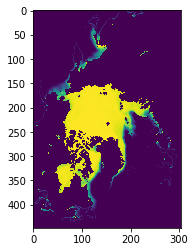

  8%|▊         | 1/12 [07:10<1:18:50, 430.05s/it]

(136192,)


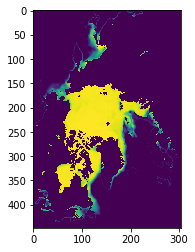

 17%|█▋        | 2/12 [13:15<1:08:27, 410.78s/it]

(136192,)


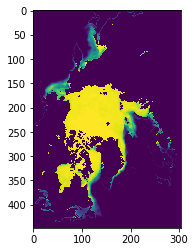

 25%|██▌       | 3/12 [19:02<58:43, 391.51s/it]  

(136192,)


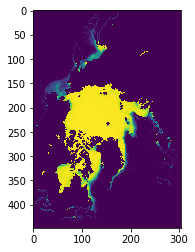

 33%|███▎      | 4/12 [26:11<53:42, 402.77s/it]

(136192,)


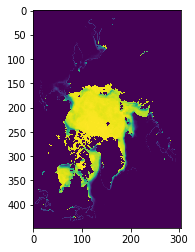

 42%|████▏     | 5/12 [33:02<47:17, 405.35s/it]

(136192,)


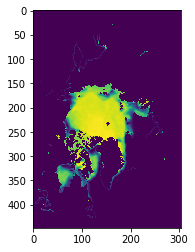

 50%|█████     | 6/12 [41:22<43:22, 433.79s/it]

(136192,)


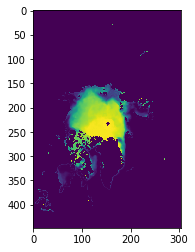

 58%|█████▊    | 7/12 [50:04<38:20, 460.00s/it]

(136192,)


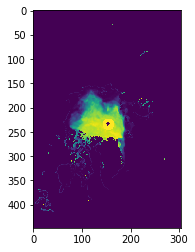

 67%|██████▋   | 8/12 [58:30<31:35, 473.83s/it]

(136192,)


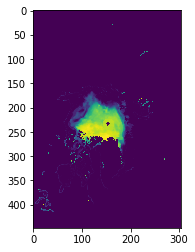

 75%|███████▌  | 9/12 [1:07:08<24:21, 487.20s/it]

(136192,)


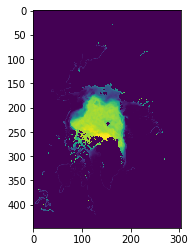

 83%|████████▎ | 10/12 [1:14:15<15:38, 469.16s/it]

(136192,)


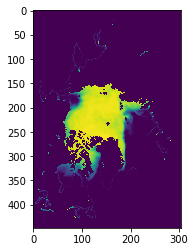

 92%|█████████▏| 11/12 [1:21:13<07:33, 453.68s/it]

(136192,)


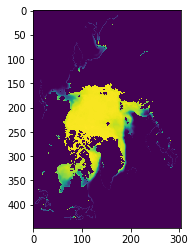

100%|██████████| 12/12 [1:28:28<00:00, 442.38s/it]

(136192,)


In [ ]:
# 월별 K값을 각각 설정
# 3월 31일
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  dataset = globals()['train{}'.format(i)]

  # 월별로 따로따로
  if i == 0:
    k = 850
    j = 7
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 1:
    k = 150
    j = 7
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 2:
    k = 200
    j = 7
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 3:
    k = 500
    j = 4
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 4:
    k = 450
    j = 6
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 5:
    k = 600
    j = 4
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 6:
    k = 550
    j = 4
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 7:
    k = 200
    j = 4
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 8:
    k = 200
    j = 4
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 9:
    k = 150
    j = 7
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 10:
    k = 300
    j = 6
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T

  elif i == 11:
    k = 601
    j = 5
    x_train = dataset[j+1:18].reshape( (17-j),-1).T
    y_train = dataset[18].reshape(1,-1).T 
    x_test = dataset[(2+j):19].reshape( (17-j),-1).T


  # 모델 훈련
  model = KNeighborsRegressor(n_neighbors=k, weights='distance', p=1, n_jobs=-1) 
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)
  predictions = predictions.reshape(-1)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

두달 합쳐서

In [ ]:
# 2달을 합쳐서 데이터셋 생성
for i in tqdm(range(6)):
  dataa = globals()['train{}'.format((i*2))][6:19]
  datab = globals()['train{}'.format((i*2)+1)][6:19]

  globals()['train_two{}'.format(i)] = np.array(np.concatenate((dataa, datab), axis=0))

  print("\n",globals()['train_two{}'.format(i)].shape)

100%|██████████| 6/6 [00:00<00:00, 382.64it/s]


 (26, 448, 304)

 (26, 448, 304)

 (26, 448, 304)

 (26, 448, 304)

 (26, 448, 304)

 (26, 448, 304)


In [ ]:
a = list(range(0,12))
b = list(range(13, 25))

a,b

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
train_two0[a+b].shape

(24, 448, 304)

In [ ]:
c = list(range(1,12))
d = list(range(15,26))

c,d

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
# 두달 간... 실패
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(6)):
  datan = globals()['train_two{}'.format(i)]

  # 변수 순서 선정
  a = list(range(0,12))
  b = list(range(13,25))
  c = list(range(1,13))
  d = list(range(14,26))

  # 데이터 전처리
  x_train = datan[a+b].reshape(12,-1).T 
  y_train = datan[[11, 25]].reshape(1,-1).T
  x_test = datan[c+d].reshape(12,-1).T

  # 모델 훈련
  model = KNeighborsRegressor(n_neighbors=601, weights='distance', p=1, n_jobs=-1) 
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)
  predictions = predictions.reshape(-1)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(2,448,304)[0], interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

기본

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  # x_train = datan[:10].reshape(10,-1).T  # 780
  # y_train = datan[10].reshape(1,-1).T
  # x_test = datan[1:11].reshape(10,-1).T

  # x_train = datan[:11].reshape(11,-1).T  # 400
  # y_train = datan[11].reshape(1,-1).T
  # x_test = datan[1:12].reshape(11,-1).T

  # x_train = datan[7:18].reshape(11,-1).T  # 449
  # y_train = datan[18].reshape(1,-1).T
  # x_test = datan[8:19].reshape(11,-1).T

  x_train = datan[9:18].reshape(9,-1).T  # 600
  y_train = datan[18].reshape(1,-1).T
  x_test = datan[10:19].reshape(9,-1).T

  # x_train = datan[8:18].reshape(10,-1).T 
  # y_train = datan[18].reshape(1,-1).T
  # x_test = datan[9:19].reshape(10,-1).T

  # 모델 훈련
  model = KNeighborsRegressor(n_neighbors=601, weights='distance', p=1, n_jobs=-1) 
  model.fit(x_train, y_train)

  # 모델 예측
  predictions = model.predict(x_test)
  predictions = predictions.reshape(-1)

  # 소숫점은 다 사라져 함수 생성
  # def fun(x) : 
  #   return np.round_(x, 0)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
# 최종 데이터 생성 : 변동성의 합
# mvtrain 데이터를 사용했을때 만 사용

# for i in tqdm(range(12)):
#   ori = globals()['train{}'.format(i)][10].reshape(-1)
#   pr = globals()['pred{}'.format(i)]

#   globals()['mvpred_{}'.format(i)] = ori + pr
#   print(globals()['mvpred_{}'.format(i)].shape)

#   # 그래프를 보자구
#   plt.imshow(globals()['mvpred_{}'.format(i)].reshape(448,304), interpolation = 'None')
#   plt.show()

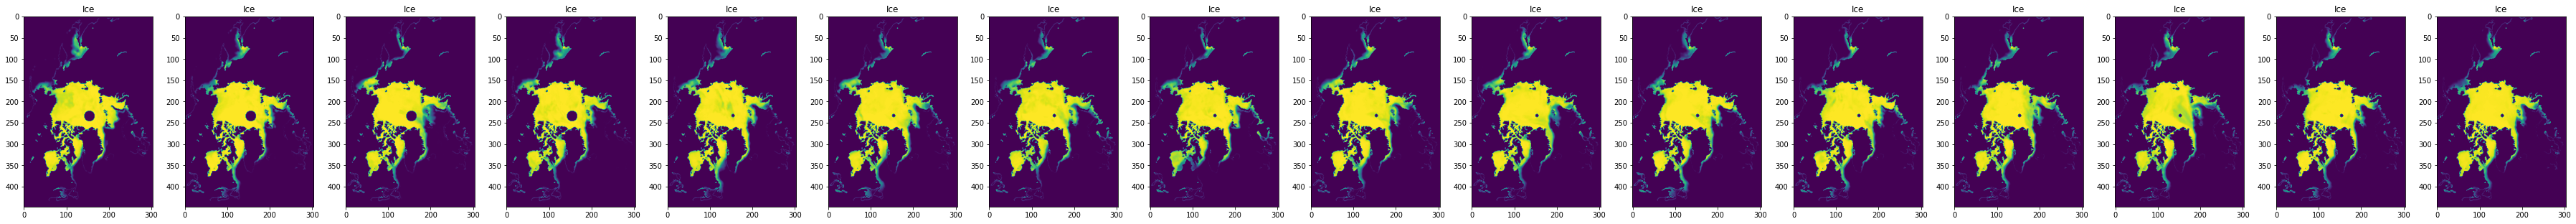

In [ ]:
# 원본데이터랑 예측데이터랑 합쳐서
show(np.concatenate((train0[4:], fun1(pred0).reshape(1,448,304))))

In [ ]:
# 데이터 확인
pred0

In [ ]:
# 데이터 확인
pred0.reshape(448,304)[250,200], train0[10][250,200]

In [ ]:
# 절댓값 추가
np.abs(fun(pred0))

> 데이터는 훈련 데이터의 개수를 의미, 실제는 12개
* Dacon 4.09의 결과물 : (n_neighbors=2000, weights='distance', algorithm='brute', p=1)
* Dacon 4.0859의 결과물 : (n_neighbors=1900, weights='distance', p=1, n_jobs=-1)
* Dacon 3.9763의 결과물: (n_neighbors=1000, weights='distance', p=1, n_jobs=-1)
* Dacon 3.9515의 결과물: (n_neighbors=780, weights='distance', p=1, n_jobs=-1)
* **Dacon 3.9020의 결과물: 11개의 데이터 (n_neighbors=400, weights='distance', p=1, n_jobs=-1)**
* Dacon 3.9239의 결과물: 16개의 데이터 (n_neighbors=350, weights='distance', p=1, n_jobs=-1)
* **Dacon 3.8993의 결과물: 11개의 데이터 (n_neighbors=430, weights='distance', p=1, n_jobs=-1)**
* **Dacon 3.8984의 결과물: 11개의 데이터 (n_neighbors=439, weights='distance', p=1, n_jobs=-1)**
* Dacon 3.9329의 결과물: 14개의 데이터 (n_neighbors=439, weights='distance', p=1, n_jobs=-1)
* Dacon 3.9287의 결과물: 13개의 데이터 (n_neighbors=420, weights='distance', p=1, n_jobs=-1)
* **Dacon 3.8974의 결과물: 11개의 데이터 (n_neighbors=449, weights='distance', p=1, n_jobs=-1)**
* **Dacon 3.8572의 결과물: 12개의 데이터 (n_neighbors=600, weights='distance', p=1, n_jobs=-1)**
* Dacon 3.9304의 결과물: 10개의 데이터 (n_neighbors=600, weights='distance', p=1, n_jobs=-1)
* Dacon 의 결과물: 11개의 데이터 (n_neighbors=601, weights='distance', p=1, n_jobs=-1)

## 데이터 4등분(4 Data)

#### 시험용

In [ ]:
# 데이터 1개
x_train = train0[:9].reshape(9,-1).T
y_train = train0[9].reshape(1,-1).T
x_test = train0[1:10].reshape(9,-1).T

real = train0[10]

In [ ]:
# 4등분 데이터 셋 생성
for i in range(4):
  print(i)

  globals()['x_train_{}'.format(i)] = train0[:9].reshape(9,-1)[:,34048*i:34048*(i+1)].T
  globals()['y_train_{}'.format(i)] = train0[9].reshape(1,-1)[:,34048*i:34048*(i+1)].T
  globals()['x_test_{}'.format(i)] = train0[1:10].reshape(9,-1)[:,34048*i:34048*(i+1)].T
  globals()['real_{}'.format(i)] = train0[10][112*i:112*(i+1),:304]

  print(globals()['x_train_{}'.format(i)].shape)
  print(globals()['y_train_{}'.format(i)].shape)
  print(globals()['x_test_{}'.format(i)].shape)
  print(globals()['real_{}'.format(i)].shape)

In [ ]:
# 실제 4등분 데이터 확인
import matplotlib.pyplot
matplotlib.pyplot.imshow(real_2, interpolation = 'None')
matplotlib.pyplot.title('자른 데이터 확인')

RandomForest 모델

In [ ]:
# RandomForest 모델 1
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_features='sqrt', n_estimators=600)
model.fit(x_train_2, y_train_2)

In [ ]:
# RandomForest 모델 2
print(model.score(x_train_2, y_train_2))

In [ ]:
# RandomForest 모델 3
pre = model.predict(x_test_2)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real_2.reshape(-1), np.abs(fun(pre))))

In [ ]:
# RandomForest 모델 4
show(np.concatenate((real_2.reshape(1,112,304), np.abs(fun(pre)).reshape(1,112,304))))

LARS Lasso 모델

In [ ]:
# LARS Lasso 모델 1
from sklearn import linear_model

model = linear_model.LassoLars(alpha=0.01)
model.fit(x_train_2, y_train_2)

In [ ]:
# LARS Lasso 모델 2
print(model.score(x_train_2, y_train_2))

In [ ]:
# LARS Lasso 모델 3
pre = model.predict(x_test_2)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real_2.reshape(-1), np.abs(fun(pre))))

In [ ]:
# LARS Lasso 모델 4
show(np.concatenate((real_2.reshape(1,112,304), np.abs(fun(pre)).reshape(1,112,304))))

DecisonTreeRegressor 모델

In [ ]:
# DecisionTreeRegressor 모델 1
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='mse')
model.fit(x_train_2, y_train_2)

In [ ]:
# DecisionTreeRegressor 모델 2
print(model.score(x_train_2, y_train_2))

In [ ]:
# DecisionTreeRegressor 모델 3
pre = model.predict(x_test_2)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real_2.reshape(-1), np.abs(fun(pre))))

In [ ]:
# DecisionTreeRegressor 모델 4
show(np.concatenate((real_2.reshape(1,112,304), np.abs(fun(pre)).reshape(1,112,304))))

HuberRegressor 모델

In [ ]:
# HuberRegressor 모델 1
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(x_train_2, y_train_2)

In [ ]:
# HuberRegressor 모델 2
print(model.score(x_train_2, y_train_2))

In [ ]:
# HuberRegressor 모델 3
pre = model.predict(x_test_2)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real_2.reshape(-1), np.abs(fun(pre))))

In [ ]:
# HuberRegressor 모델 4
show(np.concatenate((real_2.reshape(1,112,304), np.abs(fun(pre)).reshape(1,112,304))))

SGDRegressor 모델

In [ ]:
# SGDRegressor 모델 1
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss='huber',learning_rate='optimal')
model.fit(x_train_2, y_train_2)

In [ ]:
# SGDRegressor 모델 2
print(model.score(x_train_2, y_train_2))

In [ ]:
# SGDRegressor 모델 3
pre = model.predict(x_test_2)
pre

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real_2.reshape(-1), np.abs(fun(pre))))

In [ ]:
# SGDRegressor 모델 4
show(np.concatenate((real_2.reshape(1,112,304), np.abs(fun(pre)).reshape(1,112,304))))

KNeighborsRegressor 모델

In [ ]:
# KNeighborsRegressor 모델 1
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=1300, weights='distance', algorithm='auto', p=1)  # 1500은 4.13, 2000은 4.17, 1300은 4.11, 1000은 4.13, 500은 4.16, 5000은 5.57
model.fit(x_train_2, y_train_2)

In [ ]:
# KNeighborsRegressor 모델 2
# print(model.score(x_train_2, y_train_2))

In [ ]:
# KNeighborsRegressor 모델 3
pre = model.predict(x_test_2)
pre = pre.reshape(-1)
pre 

In [ ]:
# 제출물 계산
print( "MAE : %s" % mae_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real_2.reshape(-1), np.abs(fun(pre))))

항목의 발생 횟수를 계산
* https://www.delftstack.com/ko/howto/python/how-to-count-the-occurrences-of-an-item-in-a-one-dimensional-array-in-python/

In [ ]:
# 항목 확인
# 배열 내 중복된 원소 제거 후 유일한 원소를 정렬하여 반환
np.unique(np.abs(fun(pre)))

In [ ]:
# KNeighborsRegressor 모델 4
show(np.concatenate((real_2.reshape(1,112,304), np.abs(fun(pre)).reshape(1,112,304))))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

num = [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300]

for i in tqdm(num):
  print(i)
  model = KNeighborsRegressor(n_neighbors=i, weights='distance', algorithm='auto', p=1)
  model.fit(x_train_2, y_train_2)

  pre = model.predict(x_test_2)
  pre = pre.reshape(-1)
  
  print( "MAE : %s" % mae_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n F1 : %s' % f1_score(real_2.reshape(-1), np.abs(fun(pre))),
      '\n Final %s' % mae_over_f1(real_2.reshape(-1), np.abs(fun(pre))))

#### KNeighborsRegressor4

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[:10].reshape(10,-1)
  y_train = datan[10].reshape(1,-1)
  x_test = datan[1:11].reshape(10,-1)

  # 예측 데이터 생성
  predd = []

  # 4등분 데이터 셋 생성
  for j in range(4):
    a = globals()['x_train{}'.format(j)] = x_train[:,34048*j:34048*(j+1)].T
    b = globals()['y_train{}'.format(j)] = y_train[:,34048*j:34048*(j+1)].T
    c = globals()['x_test{}'.format(j)] = x_test[:,34048*j:34048*(j+1)].T

    # 모델 훈련
    model = KNeighborsRegressor(n_neighbors=1200, weights='distance', p=1, n_jobs=-1)
    model.fit(a, b)

    # 모델 예측
    predict = model.predict(c)
    
    predd.append(predict)

  # 완성된 예측 데이터 정제
  predictions = np.array(predd)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

In [ ]:
# 최종 데이터 생성 : 변동성의 합
# mvtrain 데이터를 사용했을때 만 사용

# for i in tqdm(range(12)):
#   ori = globals()['train{}'.format(i)][10].reshape(-1)
#   pr = globals()['pred{}'.format(i)]

#   globals()['mvpred_{}'.format(i)] = ori + pr
#   print(globals()['mvpred_{}'.format(i)].shape)

#   # 그래프를 보자구
#   plt.imshow(globals()['mvpred_{}'.format(i)].reshape(448,304), interpolation = 'None')
#   plt.show()

In [ ]:
# 원본데이터랑 예측데이터랑 합쳐서
show(np.concatenate((train0, np.abs(fun(pred0)).reshape(1,448,304))))

In [ ]:
# 데이터 확인
pred0.shape

In [ ]:
# 데이터 확인
pred0.reshape(448,304)[250,200], train0[10][250,200]

#### KNeighborsRegressor3

In [ ]:
# 데이터셋 나누기 확인
x_train = train0[:10].reshape(10,-1)
x_train[:,:34048].T.shape, x_train[:,34048:102144].T.shape, x_train[:,102144:].T.shape

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

for i in tqdm(range(12)):
  datan = globals()['train{}'.format(i)]

  # 데이터셋 나누기
  x_train = datan[:10].reshape(10,-1)
  y_train = datan[10].reshape(1,-1)
  x_test = datan[1:11].reshape(10,-1)

  # 예측 데이터 생성 (numpy)
  predd = np.array([])

  # 3등분 데이터 셋 생성
  x_train0, x_train1, x_train2 = x_train[:,:34048].T, x_train[:,34048:102144].T, x_train[:,102144:].T
  y_train0, y_train1, y_train2 = y_train[:,:34048].T, y_train[:,34048:102144].T, y_train[:,102144:].T
  x_test0, x_test1, x_test2 = x_test[:,:34048].T, x_test[:,34048:102144].T, x_test[:,102144:].T

  # 3등분의 모델
  for j in tqdm(range(3)):
    a = globals()['x_train{}'.format(j)]
    b = globals()['y_train{}'.format(j)]
    c = globals()['x_test{}'.format(j)]

    # 모델 훈련
    model = KNeighborsRegressor(n_neighbors=1900, weights='distance', p=1, n_jobs=-1)
    model.fit(a, b)

    # 모델 예측
    predict = model.predict(c)
    
    predd = np.append(predd, predict)

  # 완성된 예측 데이터 정제
  predictions = np.array(predd)

  # 그래프를 보자구
  plt.imshow(predictions.reshape(448,304), interpolation = 'None')
  plt.show()

  # 변수 저장
  globals()['pred{}'.format(i)] = predictions
  print(globals()['pred{}'.format(i)].shape)

In [ ]:
predict.shape

In [ ]:
aaa = np.array([])

np.append(aaa, predict).shape

In [ ]:
predd

In [ ]:
predict.shape

In [ ]:
predictions.shape

In [ ]:
x_train0.shape

In [ ]:
a.shape, b.shape

In [ ]:
model = KNeighborsRegressor(n_neighbors=10, weights='distance', p=1, n_jobs=-1)
model.fit(a, b)

In [ ]:
# 모델 예측
predict = model.predict(c)

In [ ]:
predict.reshape(-1).shape

In [ ]:
np.array(predd).shape

In [ ]:
predictions.shape

In [ ]:
# 원본데이터랑 예측데이터랑 합쳐서
show(np.concatenate((train0, np.abs(fun(pred0)).reshape(1,448,304))))

In [ ]:
# 데이터 확인
pred0

In [ ]:
# 데이터 확인
pred0.reshape(448,304)[250,200], train0[10][250,200]

# 제출

In [ ]:
# 제출 형태로 변환

# 데이터 생성
sh1 = pd.DataFrame(pred0.reshape(1,-1))  # 초기값 설정
sh1 = fun1(sh1)  # 음수와 소숫점 없애기

for i in range(11):
  globals()['pred{}'.format(i+1)] = globals()['pred{}'.format(i+1)].reshape(1,-1)

  sh = globals()['pred{}'.format(i+1)]
  sh = fun1(sh)  # 음수와 소숫점 없애기
  sh = pd.DataFrame(sh)

  sh1 = pd.concat((sh1, sh), axis=0)
  print(sh1.shape)

(2, 136192)
(3, 136192)
(4, 136192)
(5, 136192)
(6, 136192)
(7, 136192)
(8, 136192)
(9, 136192)
(10, 136192)
(11, 136192)
(12, 136192)


In [ ]:
# 1차 데이터 확인 (Pre-제출본)
sh1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# sh1의 인덱스 수정

# 12개월, 24개월 투투
result = pd.concat([sh1,sh1], axis=0)
result = result.reset_index(drop=True)

# 제출 파일과 결합
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/data/sample_submission.csv")
sub = pd.concat([submission.loc[:,'month'],result], axis=1)
sub.columns = submission.columns.values  # 제출파일에서 컬럼명을 
sub.tail()

,month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,136152,136153,136154,136155,136156,136157,136158,136159,136160,136161,136162,136163,136164,136165,136166,136167,136168,136169,136170,136171,136172,136173,136174,136175,136176,136177,136178,136179,136180,136181,136182,136183,136184,136185,136186,136187,136188,136189,136190,136191
19,2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2020-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2020-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2020-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Lets Final Check')

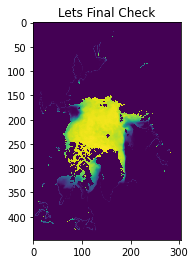

In [ ]:
# 2차 데이터 확인 (최종 제출본)
check = np.array(sub.iloc[10,1:], dtype=np.float64).reshape(448,304)

import matplotlib.pyplot
matplotlib.pyplot.imshow(check, interpolation = 'None')
matplotlib.pyplot.title('Lets Final Check')

In [ ]:
# 제출파일 완성 및 제출
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DACON 1등이 목표/result/sub_0405_3_KNN.csv', index = False)